In [1]:
from pandas import read_excel, melt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
import sys
import os
from scipy.stats import f_oneway
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 사후분석을 위한 라이브러리
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind


sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import normality_test, equal_variance_test, independence_test, all_test

# 문제 1

다음 자료는 야구팀의 홈런수와 타율에 관한 자료이다. 홈런수와 평균타율이 상관관계가 있는지 그 관련성을 분석하라.

In [2]:
df = read_excel('https://data.hossam.kr/E03/baseball.xlsx')
df

,홈런수,평균타율
0,174,0.277
1,163,0.276
2,161,0.272
3,230,0.272
4,214,0.269
5,194,0.266
6,187,0.263
7,167,0.262
8,190,0.262
9,196,0.261


In [3]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

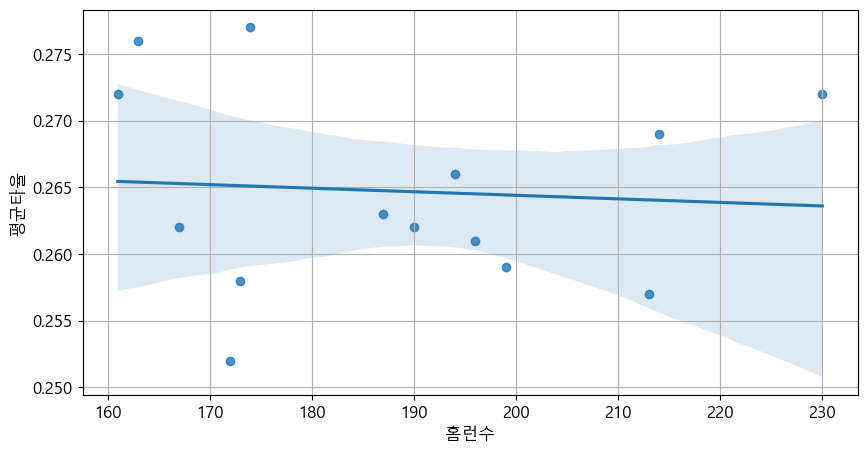

In [4]:
sb.regplot(data = df, x = '홈런수', y = '평균타율')

plt.grid()
plt.show()
plt.close()

In [5]:
np.cov(df['홈런수'], df['평균타율'])[0, 1]

-0.011824175824175834

In [6]:
np.corrcoef(df['홈런수'], df['평균타율'])[0, 1]

-0.07469493488185412

In [7]:
r, p = stats.pearsonr(df['홈런수'], df['평균타율'])
"상관 계수 : %f, p-value : %f" % (r, p)

'상관 계수 : -0.074695, p-value : 0.799666'

#### 결과 해석

  - p-value > 0.05 이므로 홈럼수와 평균 타율을 상관 관계를 찾아볼 수 없다

# 문제 2

어떤 원료의 품질특성(
)과 이 원료를 사용하여 만든 제품의 품질특성(
)에 관한 조사를 한 결과 다음 데이터를 얻었다.

이들 간 상관관계를 구하고 상관 유무 검정을 유의수준 5%에서 실시하라.

In [8]:
af = read_excel('https://data.hossam.kr/E03/product.xlsx')
af

,x,y
0,36,29
1,40,32
2,34,29
3,44,40
4,33,31
5,36,29
6,40,34
7,33,30
8,26,25
9,36,31


In [9]:
r, p = stats.pearsonr(af['x'], af['x'])
"상관 계수 : %f, p-value : %f" % (r, p)

'상관 계수 : 1.000000, p-value : 0.000000'

In [10]:
hsd = pairwise_tukeyhsd(af['x'], af['y'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
25,29,9.3333,0.072,-1.3661,20.0328,False
25,30,7.0,0.2346,-6.1041,20.1041,False
25,31,8.5,0.1065,-2.8485,19.8485,False
25,32,14.0,0.0418,0.8959,27.1041,True
25,34,14.0,0.0418,0.8959,27.1041,True
25,40,18.0,0.0207,4.8959,31.1041,True
29,30,-2.3333,0.8198,-13.0328,8.3661,False
29,31,-0.8333,0.9923,-9.292,7.6253,False
29,32,4.6667,0.3512,-6.0328,15.3661,False
29,34,4.6667,0.3512,-6.0328,15.3661,False


# 문제 3

다음은 10명의 학생들에 대한 공부 시간과 성적 데이터이다. 분석하라.

In [11]:
sf = read_excel('https://data.hossam.kr/E03/study_time.xlsx')
sf

,공부시간,성적
0,2,65
1,4,85
2,3,75
3,5,90
4,6,95
5,7,70
6,8,80
7,9,85
8,10,100
9,1,60
